<a href="https://colab.research.google.com/github/rishikrocks/Rishik/blob/master/DIN_ASSIGNMNET_4%265.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Create a DataFrame**

**2. Prepare the Data for Modeling: Change column names and recode as below.**

In [ ]:
import pandas as pd

# Read the CSV file and create the DataFrame
crc_seer_df = pd.read_csv("CRC_SEER_Modified.csv")

# Rename columns
crc_seer_df.rename(columns={"Year of diagnosis": "Year",
                             "Race recode (W, B, AI, API)": "Race",
                             "Sex": "Sex",
                             "Age recode with single ages and 100+": "Age",
                             "Survival months": "SurvivalMonths",
                             "Marital status at diagnosis": "MaritalStatus",
                             "target": "Survival Recode"}, inplace=True)

# Recode Race column values
race_mapping = {'White': 1, 'Black': 2, 'Asian or Pacific Islander': 3, 'American Indian/Alaskan Native': 4, 'Hispanic': 5, 'Blank': 6}
crc_seer_df['Race'] = crc_seer_df['Race'].map(race_mapping)

# Recode Sex column values
sex_mapping = {'Male': 1, 'Female': 0}
crc_seer_df['Sex'] = crc_seer_df['Sex'].map(sex_mapping)

# Reset Age 100+ to 101
crc_seer_df['Age'] = crc_seer_df['Age'].apply(lambda x: 101 if x == 100 else x)

# Recode MaritalStatus column values
marital_status_mapping = {'Married (including common law)': 1, 'Single (never married)': 2, 'Divorced': 3, 'Widowed': 4, 'Unknown': 5}
crc_seer_df['MaritalStatus'] = crc_seer_df['MaritalStatus'].map(marital_status_mapping)

# Rename target column to Survival Recode
crc_seer_df.rename(columns={"target": "Survival Recode"}, inplace=True)

# Display the DataFrame
print(crc_seer_df)


       Year  Race  Sex       Age SurvivalMonths  MaritalStatus  \
0      2000   1.0    1  82 years             17            1.0   
1      2000   1.0    1  76 years             67            5.0   
2      2000   1.0    0  65 years             41            5.0   
3      2000   1.0    1  86 years             15            5.0   
4      2000   1.0    0  82 years              0            5.0   
...     ...   ...  ...       ...            ...            ...   
29996  2016   1.0    0  73 years             28            1.0   
29997  2016   1.0    0  63 years             28            1.0   
29998  2016   1.0    0  82 years             28            2.0   
29999  2016   1.0    0  44 years             29            1.0   
30000  2016   3.0    1  52 years             29            1.0   

       Survival Recode  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
29996                0  
29997  

**3.  Create a new dataframe “crc_seer_recoded_df” with changes in step 2 above.**

In [ ]:
import pandas as pd

# Read the CSV file and create the DataFrame
crc_seer_df = pd.read_csv("CRC_SEER_Modified.csv")

# Rename columns
crc_seer_df.rename(columns={"Year of diagnosis": "Year",
                             "Race recode (W, B, AI, API)": "Race",
                             "Sex": "Sex",
                             "Age recode with single ages and 100+": "Age",
                             "Survival months": "SurvivalMonths",
                             "Marital status at diagnosis": "MaritalStatus",
                             "target": "Survival Recode"}, inplace=True)

# Recode Race column values
race_mapping = {'White': 1, 'Black': 2, 'Asian or Pacific Islander': 3, 'American Indian/Alaskan Native': 4, 'Hispanic': 5, 'Blank': 6}
crc_seer_df['Race'] = crc_seer_df['Race'].map(race_mapping)

# Recode Sex column values
sex_mapping = {'Male': 1, 'Female': 0}
crc_seer_df['Sex'] = crc_seer_df['Sex'].map(sex_mapping)

# Reset Age 100+ to 101
crc_seer_df['Age'] = crc_seer_df['Age'].apply(lambda x: 101 if x == 100 else x)

# Recode MaritalStatus column values
marital_status_mapping = {'Married (including common law)': 1, 'Single (never married)': 2, 'Divorced': 3, 'Widowed': 4, 'Unknown': 5}
crc_seer_df['MaritalStatus'] = crc_seer_df['MaritalStatus'].map(marital_status_mapping)

# Rename target column to Survival Recode
crc_seer_df.rename(columns={"target": "Survival Recode"}, inplace=True)

# Create a new DataFrame with the changes
crc_seer_recoded_df = crc_seer_df.copy()

# Display the DataFrame
print("crc_seer_recoded_df:")
print(crc_seer_recoded_df.head())


crc_seer_recoded_df:
   Year  Race  Sex       Age SurvivalMonths  MaritalStatus  Survival Recode
0  2000   1.0    1  82 years             17            1.0                1
1  2000   1.0    1  76 years             67            5.0                1
2  2000   1.0    0  65 years             41            5.0                1
3  2000   1.0    1  86 years             15            5.0                1
4  2000   1.0    0  82 years              0            5.0                1


**4.  Split the data into train and test sets.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and y have already been created as per the previous code snippet

# Set random seed
import numpy as np
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (24000, 6)
X_test shape: (6001, 6)
y_train shape: (24000,)
y_test shape: (6001,)


**5. Polynomial Regression**

**Polynomial Regression Fits of Different Degrees**

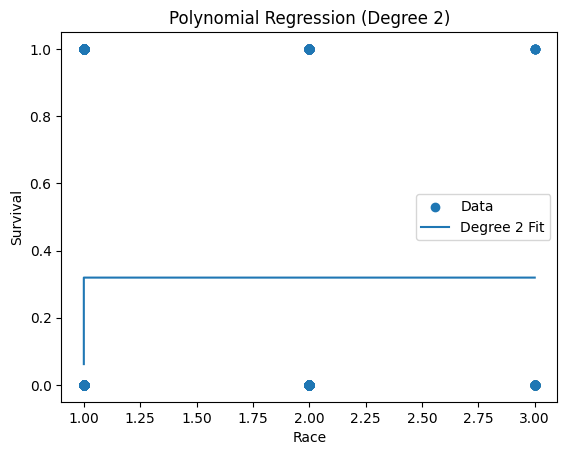

Degree 2 RMSE: 0.4537124405564966


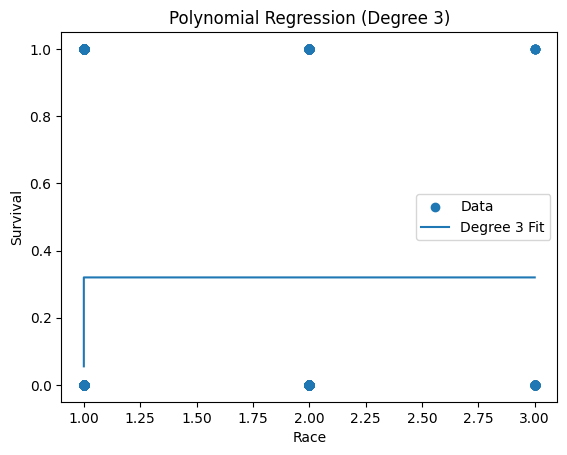

Degree 3 RMSE: 0.45371700035124557


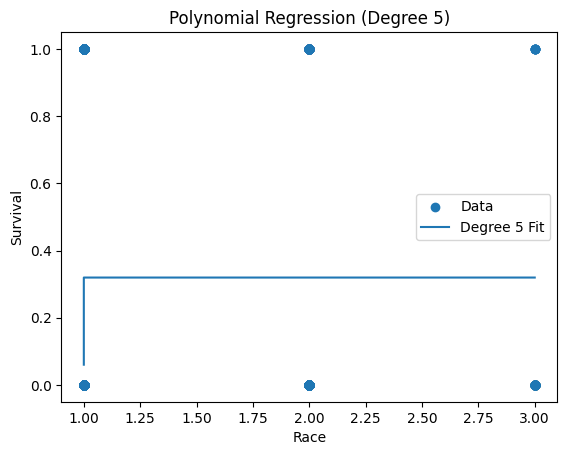

Degree 5 RMSE: 0.4537131102866243
Best Polynomial Degree: 2


In [26]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = X_train.copy()
X_train_imputed['Race'] = imputer.fit_transform(X_train[['Race']])

# Initialize degrees
degrees = [2, 3, 5]
rmse_results = []

# Loop through each degree
for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train_imputed[['Race']])

    # Polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_poly)

    # Calculate RMSE
    rmse = calculate_rmse(y_train, y_train_pred)
    rmse_results.append(rmse)

    # Plotting
    plt.scatter(X_train_imputed['Race'], y_train, label='Data')
    plt.plot(np.sort(X_train_imputed['Race']), np.sort(y_train_pred), label=f'Degree {degree} Fit')
    plt.xlabel('Race')
    plt.ylabel('Survival')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

    print(f'Degree {degree} RMSE: {rmse}')

# Find the best polynomial degree
best_degree = degrees[np.argmin(rmse_results)]
print(f'Best Polynomial Degree: {best_degree}')


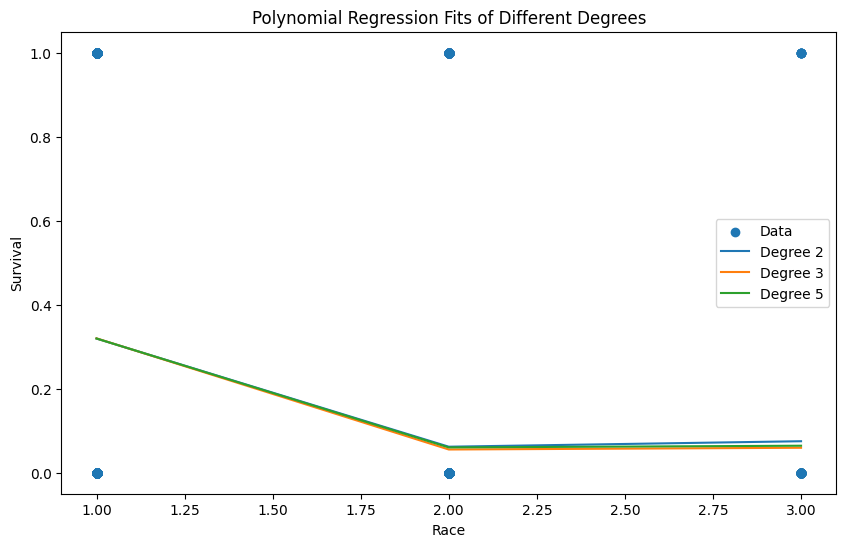

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = X_train.copy()
X_train_imputed['Race'] = imputer.fit_transform(X_train[['Race']])

# Initialize degrees
degrees = [2, 3, 5]

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot original data points
plt.scatter(X_train_imputed['Race'], y_train, label='Data')

# Loop through each degree
for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train_imputed[['Race']])

    # Polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_poly)

    # Sort the predictions by X_train_imputed['Race']
    sorted_indices = np.argsort(X_train_imputed['Race'])
    plt.plot(X_train_imputed['Race'].iloc[sorted_indices], y_train_pred[sorted_indices], label=f'Degree {degree}')

# Set labels and title
plt.xlabel('Race')
plt.ylabel('Survival')
plt.title('Polynomial Regression Fits of Different Degrees')
plt.legend()
plt.show()


# **6.   Heatmap Analysis**

<ipython-input-21-02092c0af39d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crc_seer_recoded_df.corr()


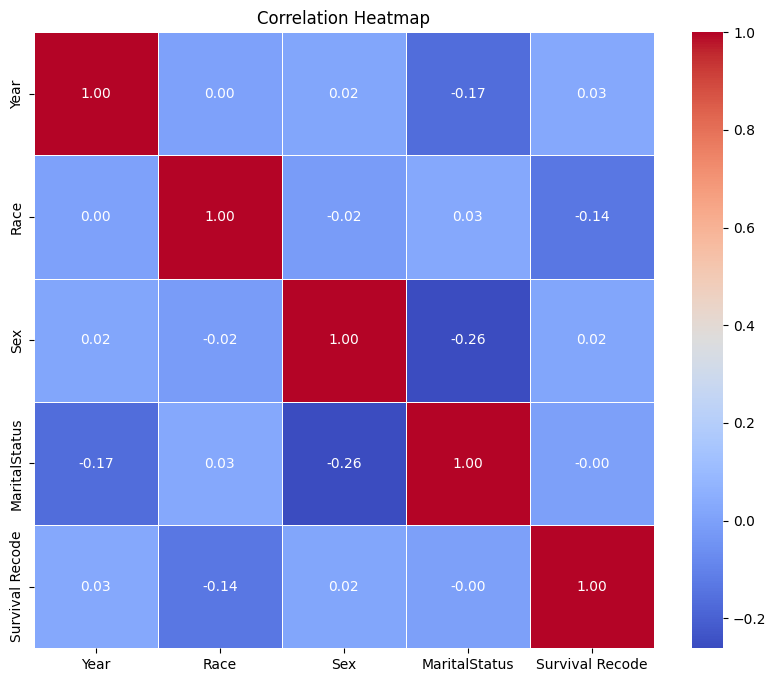

Features in decreasing order of impact with respect to Survival Recode:
Survival Recode    1.000000
Year               0.027798
Sex                0.016024
MaritalStatus     -0.004521
Race              -0.138119
Name: Survival Recode, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = crc_seer_recoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# List features in decreasing order of impact with respect to Survival Recode
sorted_features = correlation_matrix['Survival Recode'].sort_values(ascending=False)
print("Features in decreasing order of impact with respect to Survival Recode:")
print(sorted_features)


**Logistic** **Regression**

In [32]:
from sklearn.metrics import confusion_matrix

# Function to discretize predicted values into binary classes based on a threshold
def binarize_predictions(y_pred, threshold=0.5):
    return (y_pred > threshold).astype(int)

# Initialize degrees
degrees = [2, 3, 5]

# Threshold for binarizing predicted values
threshold = 0.5

# Create confusion matrices for each degree of polynomial regression
conf_matrices = {}

for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train_imputed[['Race']])

    # Polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_poly)

    # Binarize predictions
    y_train_pred_binary = binarize_predictions(y_train_pred, threshold)

    # Construct confusion matrix
    conf_matrices[f'Degree_{degree}'] = confusion_matrix(y_train, y_train_pred_binary)

# Print confusion matrices
for degree, conf_matrix in conf_matrices.items():
    print(f"Confusion Matrix (Degree {degree}):")
    print(conf_matrix)
    print()


Confusion Matrix (Degree Degree_2):
[[16782     0]
 [ 7218     0]]

Confusion Matrix (Degree Degree_3):
[[16782     0]
 [ 7218     0]]

Confusion Matrix (Degree Degree_5):
[[16782     0]
 [ 7218     0]]



In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_processed_imputed = imputer.fit_transform(X_train_processed)
X_test_processed_imputed = imputer.transform(X_test_processed)

# Initialize solvers
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_accuracy = 0
best_solver = None

# Loop through each solver
for solver in solvers:
    # Create logistic regression model
    model = LogisticRegression(solver=solver, random_state=42)

    # Train the model
    model.fit(X_train_processed_imputed, y_train)

    # Predictions on test set
    y_pred = model.predict(X_test_processed_imputed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print classification report
    print(f"Solver: {solver}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Update best solver
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_solver = solver

print("Best Solver:", best_solver)


Solver: newton-cg
Accuracy: 0.6953841026495584
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      4173
           1       0.00      0.00      0.00      1828

    accuracy                           0.70      6001
   macro avg       0.35      0.50      0.41      6001
weighted avg       0.48      0.70      0.57      6001

--------------------------------------------------
Solver: lbfgs
Accuracy: 0.6953841026495584
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      4173
           1       0.00      0.00      0.00      1828

    accuracy                           0.70      6001
   macro avg       0.35      0.50      0.41      6001
weighted avg       0.48      0.70      0.57      6001

--------------------------------------------------
Solver: liblinear
Accuracy: 0.6953841026495584
Classification Report:
              precision    recall  f1-